In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
matplotlib.rcParams.update({'font.size': 12})

### Задание 1.
Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [5]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

In [6]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [7]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
    return W

In [8]:
# reg_range - создадим список, который будем передавать в качестве reg(альфа) для модели
reg_range = np.arange(1e-10,4,0.05)
# w_range - будем сюда записывать все получившиеся веса w.
w_range = []

In [9]:
for reg in reg_range:
    w_range.append(gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=reg))

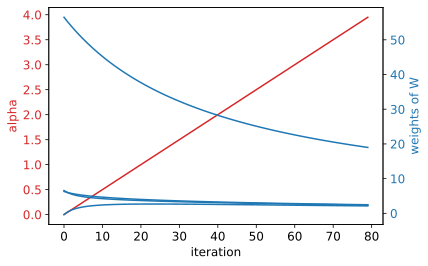

In [10]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('iteration')
ax1.set_ylabel('alpha', color=color)
ax1.plot(reg_range, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('weights of W', color=color) 
ax2.plot(w_range, color=color)
ax2.tick_params(axis='y', labelcolor=color)

**Вывод**: С увеличением alpha, сложность модели уменьшается, веса становятся меньше с каждой итерацией и стремятся к нулю.

### Задание 2.
Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [11]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-2, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W / abs(W) # градиент регуляризации
        W -= eta * (dQ + dReg)

        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [12]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-3)

Iter: 0, weights: [-0.10672781 -0.65359574  1.19467805  1.25788322], error 3473.032830953035
Iter: 500, weights: [56.49717779  5.84411371  1.22757724  5.38820935], error 25.332653335698755
Iter: 1000, weights: [56.4994999   6.18084898  0.20014287  6.11818312], error 24.95897209955987
Iter: 1500, weights: [56.4995      6.26016377 -0.15400603  6.40521294], error 24.911838903926064
Iter: 2000, weights: [56.4995      6.28641894 -0.27975471  6.50880718], error 24.905651985277935
Iter: 2500, weights: [56.4995      6.29580068 -0.32499534  6.54613838], error 24.904791464922276
Iter: 3000, weights: [56.4995      6.29917404 -0.34127822  6.55957764], error 24.904658752167776
Iter: 3500, weights: [56.4995      6.30038808 -0.34713905  6.56441511], error 24.904633918039433
Iter: 4000, weights: [56.4995      6.30082505 -0.3492486   6.56615632], error 24.90462795056803
Iter: 4500, weights: [56.4995      6.30098233 -0.35000792  6.56678305], error 24.904626187590242
Final MSE: 24.904625602896285


array([56.4995    ,  6.30103888, -0.35028091,  6.56700838])

### Задание 3.
Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Попробуем сделать это на практике, а потом обучим модельку и проверим результаты на примере весов.

In [13]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

Нормализуем:

In [14]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])

Теперь стандартизируем нормализованные данные:

In [15]:
X_st_test = X_norm.copy().astype(np.float64)
X_st_test[:, 1] = standard_scale(X_norm[:, 1])
X_st_test[:, 2] = standard_scale(X_norm[:, 2])
X_st_test[:, 3] = standard_scale(X_norm[:, 3])

Сверим веса у получившихся данных с весами только стандартизированных данных:

In [16]:
gradient_descent_reg_l2(X_st_test, y, 5000, eta=1e-2)

array([56.49999972,  6.30306393, -0.35624628,  6.57135876])

In [17]:
gradient_descent_reg_l2(X_st, y, 5000, eta=1e-2)

array([56.49999972,  6.30306298, -0.35624172,  6.571355  ])

Вроде бы веса одинаковые, соответственно, можно применить сразу и нормализацию и стандартизацию, только непонятно зачем.

### Задание 4.
Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [18]:
from sklearn.datasets import make_regression

In [19]:
X, y, coef = make_regression(n_samples=1000, n_features=6, n_informative=6, random_state=2, coef=True, noise=5)

In [20]:
np.set_printoptions(precision=4)

Коэффициенты w к которым необходимо стремиться:

In [21]:
coef

array([ 1.5409, 15.2513, 60.1403, 13.9529, 52.0033, 60.4782])

Стандартизация:

In [22]:
X_st = X.copy().astype(np.float64)
X_st[:, 0] = standard_scale(X_st[:, 0])
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])

In [23]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [29]:
def gradient_descent(X, y, iterations, eta=1e-3):
    error_list=[]
    W = np.random.randn(X.shape[1])
    w_list=[]
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        error_list.append(err)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        w_list.append(W.copy())
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, w_list, error_list

In [30]:
%%time
W_GD, w_list_GD, err_list_GD = gradient_descent(X_st, y, iterations=1000, eta=0.003)

Iter: 0, weights: [-0.827  -1.2189  1.0903 -0.0626  0.3355  0.0895], error 10176.719857368831
Iter: 100, weights: [ 0.6172  6.7456 27.5265  5.3221 23.9471 26.0053], error 3181.839072289396
Iter: 200, weights: [ 1.2334 10.9327 42.2204  8.6262 36.7854 40.7746], error 1011.2594802648305
Iter: 300, weights: [ 1.4636 13.1146 50.3886 10.6336 43.7709 49.198 ], error 335.9546180065497
Iter: 400, weights: [ 1.524  14.2398 54.9297 11.8435 47.5745 54.006 ], error 125.28810566508989
Iter: 500, weights: [ 1.5173 14.8125 57.4545 12.5679 49.6469 56.7526], error 59.384369876781186
Iter: 600, weights: [ 1.4894 15.0994 58.8583 12.9994 50.7769 58.323 ], error 38.70702916738956
Iter: 700, weights: [ 1.4595 15.24   59.6389 13.2553 51.3934 59.2217], error 32.19969111149141
Iter: 800, weights: [ 1.4343 15.307  60.073  13.4064 51.73   59.7365], error 30.145260718853006
Iter: 900, weights: [ 1.4152 15.3376 60.3144 13.4954 51.9139 60.0316], error 29.49451061787676
Final MSE: 29.287674822933585
CPU times: user 1

In [31]:
def stohastic_gradient_descent(X, y, iterations, eta=1e-3):
    error_list=[]
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    w_list=[]
    

    for i in range(0, iterations):
        
        train_ind = np.random.randint(X.shape[0], size=1)
        y_pred = np.dot(X[train_ind], W)
        new_w = W - eta * 2 / y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - y[train_ind])
        
        err = calc_mse(y, np.dot(X, new_w))
        error_list.append(err)
    
        W = new_w
        w_list.append(W.copy())
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, w_list, error_list

In [32]:
%%time
W_SGD, w_list_SGD, err_list_SGD = stohastic_gradient_descent(X_st, y, iterations=1000, eta=0.003)

Iter: 0, weights: [-0.704  -0.2569  4.2617 -1.4162  3.6143  1.5431], error 9204.090244579262
Iter: 100, weights: [-1.0896  6.8076 27.3527  6.3394 31.4907 25.6077], error 2804.8951681673725
Iter: 200, weights: [ 3.1905  9.454  43.9785 10.8971 39.3081 41.3259], error 852.5470447347889
Iter: 300, weights: [ 3.833  12.6237 50.3612 10.2685 44.801  49.2688], error 324.72013203527746
Iter: 400, weights: [ 1.9268 14.205  54.2785 10.6808 47.2315 54.0924], error 139.22048200207507
Iter: 500, weights: [ 1.1746 15.195  56.9242 11.6824 49.6477 57.1763], error 62.06184243998723
Iter: 600, weights: [ 1.8007 14.7917 58.4578 13.0628 50.2556 58.7993], error 40.565479114221674
Iter: 700, weights: [ 1.7891 14.5522 59.4213 12.8109 51.2546 59.3386], error 33.91829117350193
Iter: 800, weights: [ 1.9172 15.1082 59.7298 13.0851 51.2282 59.9178], error 31.645446704726826
Iter: 900, weights: [ 1.5915 15.0677 60.2747 13.7278 52.2644 59.928 ], error 29.713102542003348
Final MSE: 29.551554149952157
CPU times: user 

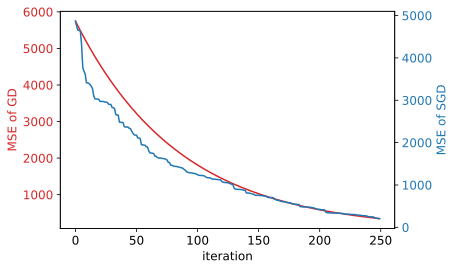

In [28]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('iteration')
ax1.set_ylabel('MSE of GD', color=color)
ax1.plot(err_list_GD[50:300], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('MSE of SGD', color=color) 
ax2.plot(err_list_SGD[50:300], color=color)
ax2.tick_params(axis='y', labelcolor=color)

На данном графике, красным цветом обозначен график уменьшение среднеквадратичной ошибки в обычном градиентном спуске по всем данным, синим цветом отображен график ошибки в модели стохастического градиентного спуска. Как видим, в случае GD график уменьшения ошибки плавный, так как ошибка уменьшается на всех данных. В случае же, SGD график уменьшения ошибки дергается, так как обучение происходит на случайной выборке, а не на всех данных. Тем не менее, результат сводится к тому же результату что в GD, что в SGD. Сравнивая время выполнения алгоритма, в моем случае GD - 180 ms, SGD - 96.9 ms, что соответствует логике, ведь SGD должен обучаться быстрее.